# 先導入所有需要的套件

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from ipywidgets import interact_manual

# 資料預處理

In [2]:
data_dir = './images'  # 資料夾的路徑
breeds = ['Abyssinian', 'American', 'Silkie', 'Skinny']
images = []
labels = []

for idx, breed in enumerate(breeds):
    breed_dir = os.path.join(data_dir, breed)
    for img_name in os.listdir(breed_dir):
        if not img_name.startswith('.'):  # 排除隱藏檔案
            img_path = os.path.join(breed_dir, img_name)
            img = load_img(img_path, target_size=(128, 128))
            images.append(img_to_array(img))
            labels.append(idx)

# 轉換成 numpy array
x_data = np.array(images, dtype='float32') / 255.  # 正規化
y_data = to_categorical(labels, num_classes=len(breeds))

# 切分資料

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# 隨機查看一筆資料的長相

(1305, 128, 128, 3)


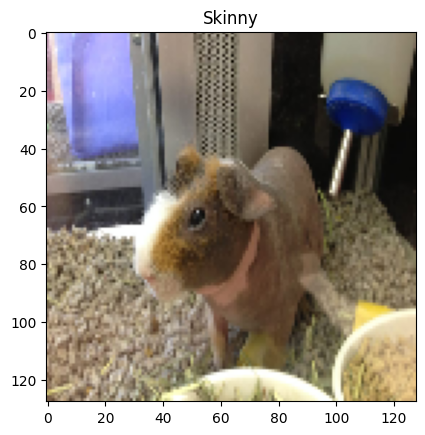

In [4]:
print(x_train.shape)
n = np.random.randint(x_train.shape[0])
plt.imshow(x_train[n], cmap='Greys')
plt.title(breeds[np.argmax(y_train[n])])
plt.show()

# 打造神經網路

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(breeds), activation='softmax')
])

# 組裝神經網路

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])

# 查看模型結構

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 128)               8

# 訓練

In [8]:
history = model.fit(x_train, y_train, epochs=35, validation_data=(x_test, y_test))

Epoch 1/35
41/41 [==============================] - 5s 112ms/step - loss: 1.3438 - accuracy: 0.3364 - val_loss: 1.3097 - val_accuracy: 0.4312
Epoch 2/35
41/41 [==============================] - 5s 112ms/step - loss: 1.3015 - accuracy: 0.3977 - val_loss: 1.2796 - val_accuracy: 0.4404
Epoch 3/35
41/41 [==============================] - 5s 112ms/step - loss: 1.2845 - accuracy: 0.3885 - val_loss: 1.2871 - val_accuracy: 0.4312
Epoch 4/35
41/41 [==============================] - 5s 112ms/step - loss: 1.2629 - accuracy: 0.4176 - val_loss: 1.3141 - val_accuracy: 0.3425
Epoch 5/35
41/41 [==============================] - 5s 114ms/step - loss: 1.2388 - accuracy: 0.4322 - val_loss: 1.2209 - val_accuracy: 0.4434
Epoch 6/35
41/41 [==============================] - 5s 115ms/step - loss: 1.2242 - accuracy: 0.4238 - val_loss: 1.2062 - val_accuracy: 0.4740
Epoch 7/35
41/41 [==============================] - 5s 119ms/step - loss: 1.1998 - accuracy: 0.4644 - val_loss: 1.2232 - val_accuracy: 0.4434
Epoch 

# 預測

In [9]:
predictions = model.predict(x_test)

11/11 [==============================] - 0s 29ms/step


# 評估正確率

In [10]:
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.61


# 儲存模型

In [11]:
model.save('./model/guinea_pig_model.h5')

/Users/wei69king/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 視覺化訓練結果

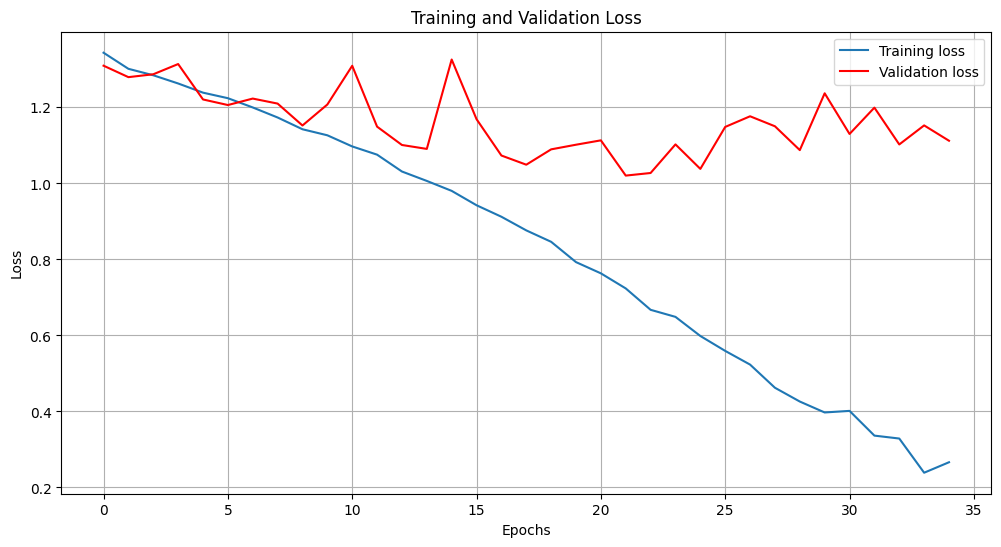

In [12]:
# 创建损失图表
plt.figure(figsize=(12, 6))

# 绘制训练损失线
plt.plot(history.history['loss'], label="Training loss")

# 绘制验证损失线，设置为红色
plt.plot(history.history['val_loss'], label="Validation loss", color='red')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  # 添加网格线

plt.show()

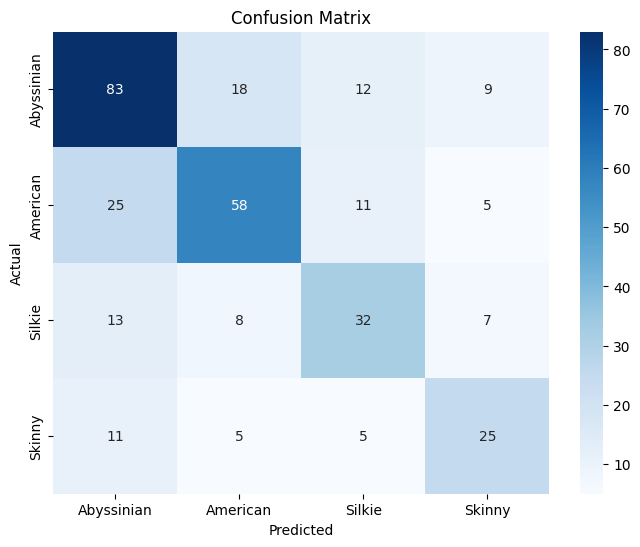

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 计算混淆矩阵
confusion = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))

# 设置图表的大小
plt.figure(figsize=(8, 6))

# 使用热图（heatmap）绘制混淆矩阵
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=breeds, yticklabels=breeds)

# 添加标签和标题
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()


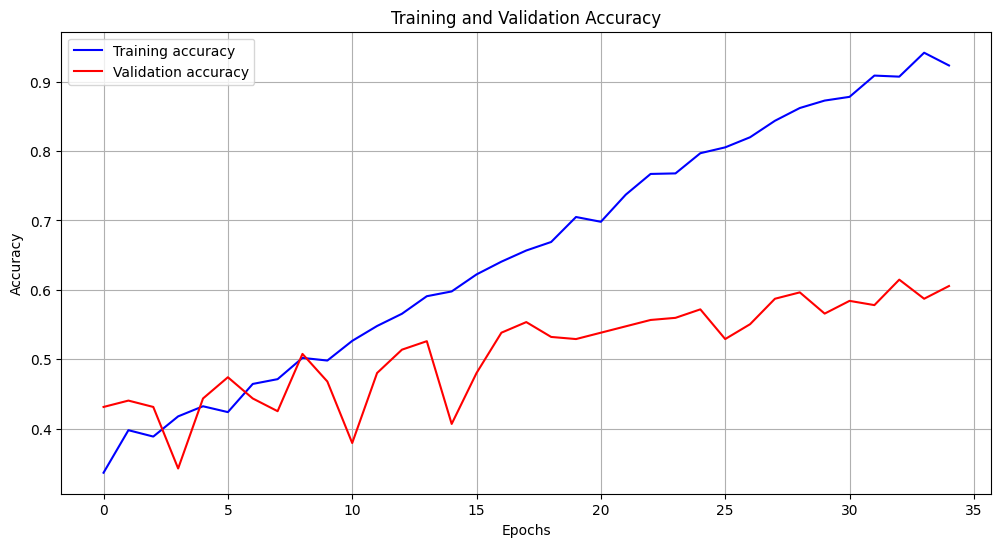

In [14]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

11/11 [==============================] - 0s 29ms/step


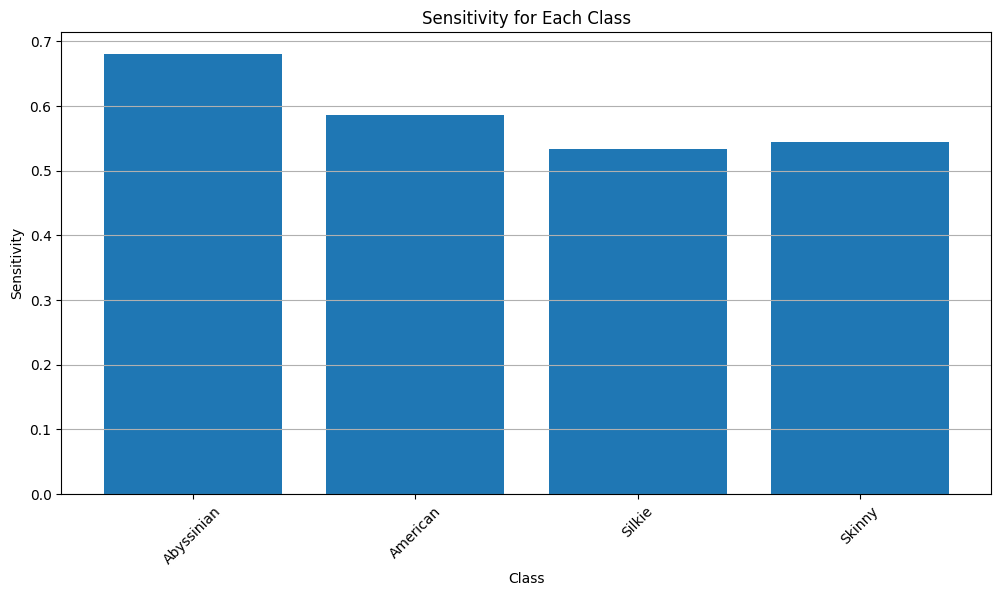

In [15]:
# 计算混淆矩阵
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion = confusion_matrix(y_true, y_pred_classes)

# 计算敏感度（True Positive Rate）
# Sensitivity = TP / (TP + FN)
TP = confusion.diagonal()
FN = confusion.sum(axis=1) - TP
sensitivity = TP / (TP + FN)

# 创建敏感度图表
plt.figure(figsize=(12, 6))
plt.bar(breeds, sensitivity)
plt.title('Sensitivity for Each Class')
plt.xlabel('Class')
plt.ylabel('Sensitivity')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

11/11 [==============================] - 0s 31ms/step


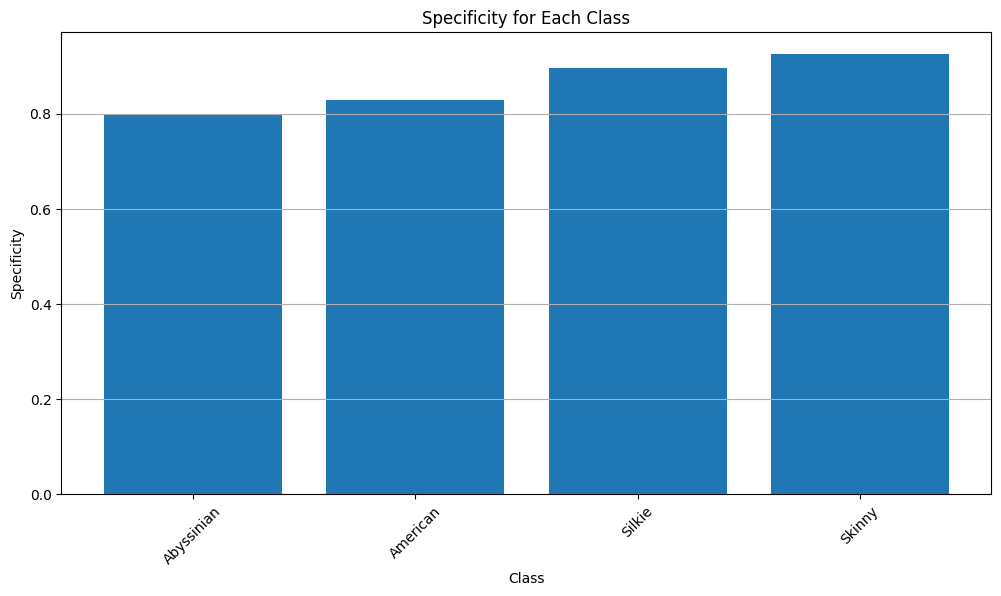

In [16]:
# 计算混淆矩阵
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion = confusion_matrix(y_true, y_pred_classes)

# 计算特异性（Specificity）
# Specificity = TN / (TN + FP)
TN = confusion.sum() - confusion.sum(axis=0) - confusion.sum(axis=1) + confusion.diagonal()
FP = confusion.sum(axis=1) - confusion.diagonal()
specificity = TN / (TN + FP)

# 创建特异性图表
plt.figure(figsize=(12, 6))
plt.bar(breeds, specificity)
plt.title('Specificity for Each Class')
plt.xlabel('Class')
plt.ylabel('Specificity')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

11/11 [==============================] - 0s 29ms/step
Accuracy: 0.61
Classification Report:
               precision    recall  f1-score   support

  Abyssinian       0.63      0.68      0.65       122
    American       0.65      0.59      0.62        99
      Silkie       0.53      0.53      0.53        60
      Skinny       0.54      0.54      0.54        46

    accuracy                           0.61       327
   macro avg       0.59      0.59      0.59       327
weighted avg       0.61      0.61      0.60       327



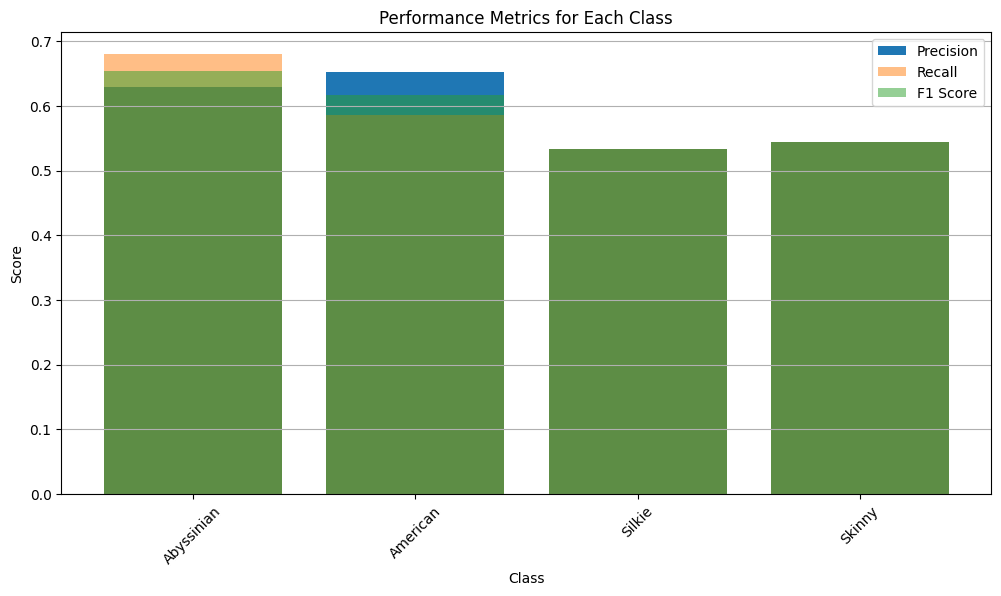

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
# 计算混淆矩阵
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion = confusion_matrix(y_true, y_pred_classes)

# 计算准确度、精确度、召回率和 F1 分数
accuracy = np.mean(y_pred_classes == y_true)
report = classification_report(y_true, y_pred_classes, target_names=breeds, output_dict=True)
precision = [report[breed]['precision'] for breed in breeds]
recall = [report[breed]['recall'] for breed in breeds]
f1_score = [report[breed]['f1-score'] for breed in breeds]

# 创建性能度量图表
plt.figure(figsize=(12, 6))
plt.bar(breeds, precision, label='Precision')
plt.bar(breeds, recall, label='Recall', alpha=0.5)
plt.bar(breeds, f1_score, label='F1 Score', alpha=0.5)
plt.title('Performance Metrics for Each Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=breeds))

plt.show()